### Link to git repository:
https://github.com/mbrochlips/CSS_project2 #????????

### Contributions:
| Name               | Part 1 | Part 2 | Part 3 |
|--------------------|--------|--------|--------|
| Mikkel (s234860)   | 40%    | 30%    | 30%    |
| Katinka (s235058)  | 30%    | 30%    | 40%    |
| Marcus (s234816)   | 30%    | 40%    | 30%    |

## Part 1: Properties of the real-world network of Computational Social Scientists

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [2]:
df_A = pd.read_csv("data/author_edgelist.csv")

### 1. Random Network

Calculate the probability (p) ref[Section 3.2, equation (3.2) in Network Science, Albert-Laszlo Barabasi]

In [3]:
G = nx.Graph()

edges = [(row['author_1'], row['author_2'], row['weight']) for index, row in df_A.iterrows()]

G.add_weighted_edges_from(edges)

N = G.number_of_nodes()
L_average = G.number_of_edges() #we only have one network, so the average is simply number of edges

p = L_average / ((N*(N-1))/2) 

p

0.0004608281457862164

After finding p, figure out the average degree (using the given formula)

In [4]:
# The average degree:

k = p*(N-1)
k # which is the average degree for a node in the network.

6.523944059895466

Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated p. Generate a random network by linking nodes in every possible pair with probability

In [5]:
def random_network(N,p):
    
    #Start with N isolated nodes.
    R = nx.Graph()
    R.add_nodes_from(range(N))

    #Select a node pair and generate a random number between 0 and 1
    for u in range(N):
        for v in range(u+1,N):
            if np.random.rand() < p: #If the number exceeds p:
                R.add_edge(u,v) #connect the selected node pair with a link, otherwise leave them disconnected.
    return R

F = random_network(N,p)

Visualize the network as you did for the Computational Social Scientists network

In [6]:
# We add the country_code attribute to color-code the nodes

G = nx.Graph()
edges = [(row['author_1'], row['author_2'], row['weight']) for index, row in df_A.iterrows()]
G.add_weighted_edges_from(edges)

df_country = pd.read_csv("data/all_authors_from_graph.csv")
country_dict = dict(zip(df_country["id"], df_country["country_code"]))
nx.set_node_attributes(G, {k: (v if pd.notna(v) and v else "Unknown") for k, v in country_dict.items()}
                       , "group")

In [7]:
import netwulf
G_components = nx.connected_components(G)
largest_component = max(G_components, key=len)
G_giant = G.subgraph(largest_component)

netwulf.visualize(network = G_giant,
                  plot_in_cell_below=True,
                    config = {"zoom": 0.6,
                        "node_charge": -45,
                        "node_gravity": 0.1517613326051338,
                        "link_distance": 12.469395139268158,
                        "link_distance_variation": 0.16,
                        "node_collision": True,
                        "wiggle_nodes": False,
                        "freeze_nodes": False,
                        "node_fill_color": "#798caa",
                        "node_stroke_color": "#555555",
                        "node_label_color": "#000000",
                        "node_size": 50,
                        "node_stroke_width": 0.2942381212452212,
                        "node_size_variation": 0.5077143637356636,
                        "display_node_labels": False,
                        "scale_node_size_by_strength": True,
                        "link_color": "#7c7c7c",
                        "link_width": 2.7268712452211905,
                        "link_alpha": 0.5012971054068814,
                        "link_width_variation": 0.4814991807755325,
                        "display_singleton_nodes": True,
                        "min_link_weight_percentile": 0,
                        "max_link_weight_percentile": 1})

# unfortunately we were unable to add a legend for the country codes

/home/marcus/Documents/Computational social science/.venv/lib/python3.12/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(
----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 48212)
Traceback (most recent call last):
  File "/usr/lib/python3.12/http/server.py", line 731, in send_head
    f = open(path, 'rb')
        ^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/home/marcus/.netwulf/favicon.ico'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.12/socketserver.py", line 318, in _handle_request_noblock
    self.process_req

(None, None)

<img src="CSS_network.png" width=800 height=800 />

The CSS network show clear signs of clustering and showing hubs in the network.

In [9]:
F_components = nx.connected_components(F)
largest_component = max(F_components, key=len)
F_giant = F.subgraph(largest_component)

netwulf.visualize(network = F_giant,
                  plot_in_cell_below=True,
                    config = {
                    "zoom": 0.6,
                    "node_charge": -62.97788093937739,
                    "node_gravity": 0.1604997269251775,
                    "link_distance": 12.033349262697978,
                    "link_distance_variation": 0.16,
                    "node_collision": True,
                    "wiggle_nodes": False,
                    "freeze_nodes": False,
                    "node_fill_color": "#798caa",
                    "node_stroke_color": "#555555",
                    "node_label_color": "#000000",
                    "node_size": 50,
                    "node_stroke_width": 0.2942381212452212,
                    "node_size_variation": 2.2641316220644456,
                    "display_node_labels": False,
                    "scale_node_size_by_strength": True,
                    "link_color": "#7c7c7c",
                    "link_width": 1.9406779082468593,
                    "link_alpha": 0.08185417804478427,
                    "link_width_variation": 0.1669169852539596,
                    "display_singleton_nodes": True,
                    "min_link_weight_percentile": 0,
                    "max_link_weight_percentile": 1})

/home/marcus/Documents/Computational social science/.venv/lib/python3.12/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


OSError: [Errno 98] Address already in use

<img src="random_network.png" width=800 height=800 />

The random network shows no clear sign af clustering or symmetry and looks random.

In [10]:
Ng = F_giant.number_of_nodes()
print(f"Ng = {Ng}, N = {N}")

Ng = 14144, N = 14158


#### Discussion:
- *What regime does your random network fall into? Is it above or below the critical threshold?
According to the textbook, what does the network's structure resemble in this regime?*

_<k_> is approximately 6.5, which exceeds the critical threshold of _<k_> = 1. This means the network is in the supercritical regime, where a giant component emerges, forming a structure with loops and cycles. In this regime, the network resembles a dense “hairball”, indicating that it is nearly fully connected, with only a few nodes remaining outside the giant component as N_g approaches the size of N.


- *Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.*

When analyzing the CSS network, we observe that a few nodes have a very high degree, while many others have a degree below _<k_>. As shown in the plot below, the network follows a heavy-tailed degree distribution, which aligns with our initial expectations for scientific collaboration networks (Table 3.1, Network Science, Albert-László Barabási).

In contrast, the random network follows a binomial distribution, forming a bell-shaped curve centered around _<k_> = 6.5. This behavior can be confirmed in the plot below.

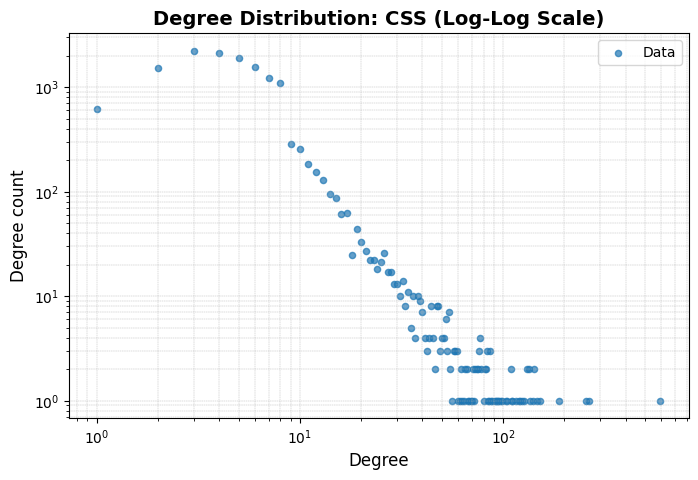

In [11]:
degree_dict = dict(G.degree())
unique_degrees, counts = np.unique(list(degree_dict.values()), return_counts=True)

# Plot log-log scatter
plt.figure(figsize=(8, 5))
plt.scatter(unique_degrees, counts, s=20, alpha=0.7, label="Data")  # Scatter plot

# Set log scales
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Degree count", fontsize=12)
plt.title("Degree Distribution: CSS (Log-Log Scale)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.3)

# Show plot
plt.show()

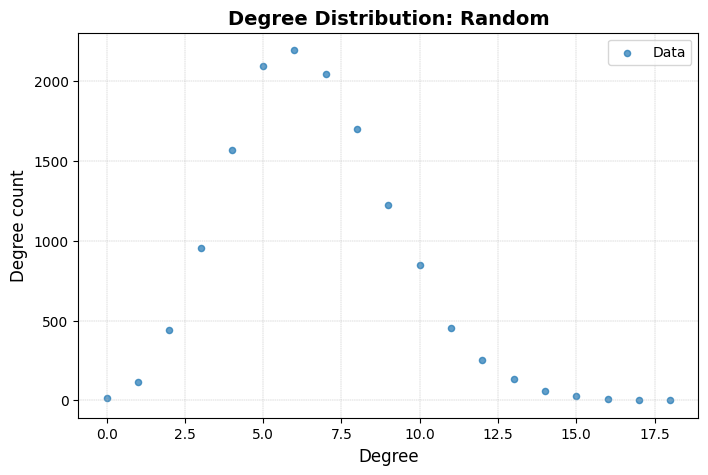

In [12]:
degree_dict = dict(F.degree())
unique_degrees, counts = np.unique(list(degree_dict.values()), return_counts=True)

# Plot log-log scatter
plt.figure(figsize=(8, 5))
plt.scatter(unique_degrees, counts, s=20, alpha=0.7, label="Data")  # Scatter plot

# Labels and title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Degree count", fontsize=12)
plt.title("Degree Distribution: Random", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.3)

# Show plot
plt.show()

### 2. Shortest Paths

In [13]:
# Begin by identifying the largest connected component within the Computational Social Scientists network
# - this was calculated just before as G_giant and F_giant

# Calculate the average (unweighted) shortest path length within this giant:
shortest_G = nx.average_shortest_path_length(G_giant,None)
shortest_F = nx.average_shortest_path_length(F_giant,None)

In [14]:
print(f"Average shortest path length for the giant in the random network: {shortest_F}")
print(f"Average shortest path lenght for the giant in CSS-network: {shortest_G}")

Average shortest path length for the giant in the random network: 5.308904343817817
Average shortest path lenght for the giant in CSS-network: 6.154703885601157


#### Discussion:
- *Why do you think I asked you to consider the giant component only?*

In the giant component, we expect to find the longest shortest paths, making it particularly relevant when investigating the small-world property. If we also consider the small components, we risk finding very small components with very short shortest paths, which would make it hard to tell if the average was low because of small components or actually short paths in the large component.

- *Why do you think I asked you to consider unweighted edges?*

The weights represent how many links the scientists have in terms of common papers. Therefore, they actually resemble some measure of connectedness and would be misleading to include in the search for the average shortest path.

- *Does the Computational Social Scientists network exhibit the small-world phenomenon?*

The CSS network has an average shortest path of 6.15, which means that, on average, there is a maximum of around six links between two scientists. This is not unexpectedly small in relation to the average shortest path in the random network, suggesting that the CSS network may not have small-world properties. However, the clustering coefficients calculated below indicate significantly higher clustering than the random network, which is a key characteristic of small-world networks. This suggests that it may still possess small-world characteristics, aligning more closely with other social networks than with random structures.

In [15]:
clustering_G = nx.average_clustering(G)
clustering_F = nx.average_clustering(F)

print(f"Clustering coefficient for the giant in the random network: {clustering_F}")
print(f"Clustering coefficient for the giant in CSS-network: {clustering_G}")


Clustering coefficient for the giant in the random network: 0.00045675451982840035
Clustering coefficient for the giant in CSS-network: 0.8438463383768866


# Part 2

In [3]:
from math import ceil
from time import sleep
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor, as_completed

from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
np.random.seed(42)

import pandas as pd
import networkx as nx

import requests
from json import JSONDecodeError

> __Exercise 1: Mixing Patterns and Assortativity__
>
> __Part 1: Assortativity Coefficient__
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**

We start by loading in the network from the edge list:

In [4]:
net_path = 'data/author_edgelist.csv'
net = pd.read_csv(net_path)
net

,author_1,author_2,weight
0,https://openalex.org/A5010373001,https://openalex.org/A5072156055,1
1,https://openalex.org/A5032475130,https://openalex.org/A5072156055,1
2,https://openalex.org/A5010373001,https://openalex.org/A5032475130,1
3,https://openalex.org/A5054630728,https://openalex.org/A5072156055,2
4,https://openalex.org/A5005839111,https://openalex.org/A5072156055,4
...,...,...,...
46178,https://openalex.org/A5067122850,https://openalex.org/A5090329397,1
46179,https://openalex.org/A5088656844,https://openalex.org/A5090329397,1
46180,https://openalex.org/A5067122850,https://openalex.org/A5088656844,1
46181,https://openalex.org/A5067122850,https://openalex.org/A5103326255,1


Now we want to make a lookup table to get the country code for each author. To do this, we need to request information from openalex, and the fastest way to do this is to batch the authors in groups of maximum 25 authors and thread the requests.

First we find all the uniqe authors and batch them up:

In [5]:
# Concatenate the authors and remove duplicates
all_authors = pd.concat([net['author_1'], net['author_2']]).unique().astype(str)

all_authors_id = np.empty(len(all_authors), dtype=object)
for i, author in enumerate(all_authors):
    all_authors_id[i] = author[21:] # romves the 'https://openalex.org/'

author_batches = np.array_split(all_authors_id, ceil(len(all_authors_id) / 25))

# Columns in the lookup table
cols = ['id', 'display_name', 'works_api_url', 'works_count', 'country_code', 'h_index']
source = 'https://api.openalex.org/authors'

print('Number of batches:', len(author_batches))
print('All authors:')
all_authors

Number of batches: 567
All authors:


array(['https://openalex.org/A5010373001',
       'https://openalex.org/A5032475130',
       'https://openalex.org/A5054630728', ...,
       'https://openalex.org/A5100727437',
       'https://openalex.org/A5100709554',
       'https://openalex.org/A5109934253'], shape=(14158,), dtype='<U32')

In [6]:
# Get request data from 1 author
def get_result(result_author: dict) -> list[int | str | None]:
    """
    Processes the result data from a single author
    :param result_author: Result dictionary from 'https://api.openalex.org/authors'
    :return: A list of values corresponding to [id, display_name, works_api_url, works_count, country_code, h_index]
    """
    last_known_institution = result_author.get('last_known_institutions', [])
    summary_stats = result_author.get('summary_stats', {})

    # Build the data row
    local_data = [result_author.get('id', None), result_author.get('display_name', None),
                  result_author.get('works_api_url', None), result_author.get('works_count', None)]
    try:
        country_code = last_known_institution[0]['country_code']
        local_data.append(country_code)
    except (IndexError, KeyError):
        local_data.append(None)
    local_data.append(summary_stats.get('h_index', None))

    return local_data


def process_author(author_batch, batch_index) -> list[list[int | str | None]]:
    """
    Process a batch of authors by making a request session and calling the API with retry logic.
    :param author_batch: List of author ids corresponding to the batch of authors. Max of 25 authors in the list!
    :param batch_index: Batch index
    :return: A list of values corresponding to [id, display_name, works_api_url, works_count]
    """
    local_session = requests.Session()

    tries = 0
    while tries < 10:
        try:
            author_ids_str = '|'.join(author_batch)
            url = (
                f'{source}?filter=id:{author_ids_str}?'
            )
            response = local_session.get(url, params={'per_page':200})
            local_results = response.json()['results']
            break  # Exit the retry loop on success
        except (JSONDecodeError, requests.exceptions.RequestException):
            tries += 1
            sleep(0.1)
    else:
        raise f'Skipping batch index {batch_index}, too many tries'

    # Collect all data into one list
    local_data = []
    for local_result in local_results:
        local_result = get_result(local_result)
        local_data.append(local_result)

    return local_data

In [7]:
results_list = []

with ThreadPoolExecutor(max_workers=10) as executor:
    # Map each batch to a future
    future_to_author = {executor.submit(process_author, batch, idx): idx for idx, batch in enumerate(author_batches)}

    for future in tqdm(as_completed(future_to_author), total=len(author_batches)):
        batch_idx = future_to_author[future]
        try:
            results = future.result()
            # Flatten the results:
            for result in results:
                results_list.append(result)
        except Exception as exc:
            print(f"Exception for batch {batch_idx}: {exc}")

# Combine the results into a DataFrame
lookup_table = pd.DataFrame(results_list, columns=cols)
lookup_table

100%|██████████| 567/567 [00:58<00:00,  9.72it/s]


,id,display_name,works_api_url,works_count,country_code,h_index
0,https://openalex.org/A5077079119,Thomas L. Griffiths,https://api.openalex.org/works?filter=author.i...,769,US,96
1,https://openalex.org/A5011035455,Adam Frank,https://api.openalex.org/works?filter=author.i...,678,US,59
2,https://openalex.org/A5056499434,David G. Rand,https://api.openalex.org/works?filter=author.i...,512,US,90
3,https://openalex.org/A5076633756,James A. Evans,https://api.openalex.org/works?filter=author.i...,306,US,42
4,https://openalex.org/A5068182184,Andrea Baronchelli,https://api.openalex.org/works?filter=author.i...,255,GB,47
...,...,...,...,...,...,...
14153,https://openalex.org/A5072023688,Anna M. Krol,https://api.openalex.org/works?filter=author.i...,11,NL,5
14154,https://openalex.org/A5102737680,Tom Mokveld,https://api.openalex.org/works?filter=author.i...,10,US,2
14155,https://openalex.org/A5040355783,David Enthoven,https://api.openalex.org/works?filter=author.i...,4,NL,2
14156,https://openalex.org/A5075990664,Giovanni Ciampaglia,https://api.openalex.org/works?filter=author.i...,2,US,1


Now that we have the lookup table, we can now save it and use it for calculating the Assortativity Coefficient.

In [8]:
lookup_table_path = 'data/author_edgelist_lookup_table.csv'

In [9]:
lookup_table.to_csv(lookup_table_path)

In [10]:
look_up_table = pd.read_csv(lookup_table_path)
look_up_table

,Unnamed: 0,id,display_name,works_api_url,works_count,country_code,h_index
0,0,https://openalex.org/A5077079119,Thomas L. Griffiths,https://api.openalex.org/works?filter=author.i...,769,US,96
1,1,https://openalex.org/A5011035455,Adam Frank,https://api.openalex.org/works?filter=author.i...,678,US,59
2,2,https://openalex.org/A5056499434,David G. Rand,https://api.openalex.org/works?filter=author.i...,512,US,90
3,3,https://openalex.org/A5076633756,James A. Evans,https://api.openalex.org/works?filter=author.i...,306,US,42
4,4,https://openalex.org/A5068182184,Andrea Baronchelli,https://api.openalex.org/works?filter=author.i...,255,GB,47
...,...,...,...,...,...,...,...
14153,14153,https://openalex.org/A5072023688,Anna M. Krol,https://api.openalex.org/works?filter=author.i...,11,NL,5
14154,14154,https://openalex.org/A5102737680,Tom Mokveld,https://api.openalex.org/works?filter=author.i...,10,US,2
14155,14155,https://openalex.org/A5040355783,David Enthoven,https://api.openalex.org/works?filter=author.i...,4,NL,2
14156,14156,https://openalex.org/A5075990664,Giovanni Ciampaglia,https://api.openalex.org/works?filter=author.i...,2,US,1


We can now calculate the Assortativity Coefficient:

In [11]:
# Construct id lookup table
id_to_country = dict(zip(look_up_table['id'], look_up_table['country_code']))
id_to_country

{'https://openalex.org/A5077079119': 'US',
 'https://openalex.org/A5011035455': 'US',
 'https://openalex.org/A5056499434': 'US',
 'https://openalex.org/A5076633756': 'US',
 'https://openalex.org/A5068182184': 'GB',
 'https://openalex.org/A5034406723': 'DK',
 'https://openalex.org/A5016146759': 'ES',
 'https://openalex.org/A5011229206': 'US',
 'https://openalex.org/A5075956753': 'IL',
 'https://openalex.org/A5069454833': 'US',
 'https://openalex.org/A5087990460': 'DE',
 'https://openalex.org/A5015642711': 'DE',
 'https://openalex.org/A5008888392': 'US',
 'https://openalex.org/A5109833231': 'SA',
 'https://openalex.org/A5069999998': 'US',
 'https://openalex.org/A5013559230': 'SA',
 'https://openalex.org/A5073189960': 'SA',
 'https://openalex.org/A5046561315': 'US',
 'https://openalex.org/A5102756489': 'SA',
 'https://openalex.org/A5063098095': 'GB',
 'https://openalex.org/A5043639182': 'IL',
 'https://openalex.org/A5027814433': 'US',
 'https://openalex.org/A5002607503': 'US',
 'https://o

In [12]:
def calculate_r(df: pd.DataFrame) -> float:
    # Initialize defaultdicts (because they start with a value of 0)
    e_uu = defaultdict(int)
    a_uu = defaultdict(int)

    e_len = 0
    a_len = 0

    # Vectorized access to DataFrame values
    author_1 = df["author_1"].values
    author_2 = df["author_2"].values

    # Lookup country codes using the id dictionary
    country_codes_1 = [id_to_country.get(a) for a in author_1]
    country_codes_2 = [id_to_country.get(a) for a in author_2]

    # Count occurrences in a_uu and count edge occurrences in e_uu
    for c1, c2 in zip(country_codes_1, country_codes_2):
        # update a
        a_uu[c1] += 1
        a_uu[c2] += 1
        a_len += 2

        # update e
        e_len += 1
        if c1 == c2:
            e_uu[c1] += 1

    # Normalize by length
    e_uu_processed = np.array( list( e_uu.values() ) ) / e_len
    a_uu_processed = np.array( list( a_uu.values() ) ) / a_len

    # Sum them up
    e_sum = np.sum(e_uu_processed)
    a_sum = np.sum(np.dot(a_uu_processed, a_uu_processed))

    # Calcualte Assortativity Coefficient r
    r = (e_sum - a_sum) / (1 - a_sum)

    return r

In [13]:
r_net = calculate_r(net)
r_net

np.float64(0.4120071855246816)

Since the Assortativity Coefficient is moderately positive, it suggests that authors from the same country tend to collaborate more often.

> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are).
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.
> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

In [14]:
def configuration_model(df: pd.DataFrame) -> pd.DataFrame:
    #  a.
    df = df.copy()
    # Shuffle DataFrame
    df = df.sample(frac=1).reset_index(drop=True)

    author_1 = df["author_1"].values.copy()
    author_2 = df["author_2"].values.copy()

    n = len(df)
    n_pairs = n // 2
    # even indices: first row in each pair
    idx = np.arange(0, n_pairs * 2, 2)

    #  b.
    # Extract pairs for rows i and i+1.
    e1_author1 = author_1[idx].copy()
    e1_author2 = author_2[idx].copy()
    e2_author1 = author_1[idx + 1].copy()
    e2_author2 = author_2[idx + 1].copy()

    #  c.
    # Generate a random swap mask with a 50% chance of swapping
    swap_mask = np.random.rand(n_pairs) >= 0.5

    # For pairs that need swapping, swap the two elements of e1.
    temp_e1_author1 = e1_author1.copy()
    temp_e1_author2 = e1_author2.copy()
    e1_author1[swap_mask] = temp_e1_author2[swap_mask]
    e1_author2[swap_mask] = temp_e1_author1[swap_mask]

    #  d.
    # Reconstruct new pairs exactly as in the loop:
    new_e1_author1 = e1_author1      # first element for row i
    new_e1_author2 = e2_author2      # second element for row i
    new_e2_author1 = e2_author1      # first element for row i+1
    new_e2_author2 = e1_author2      # second element for row i+1

    # Write the new values back into the full arrays.
    author_1[idx] = new_e1_author1
    author_2[idx] = new_e1_author2
    author_1[idx + 1] = new_e2_author1
    author_2[idx + 1] = new_e2_author2

    #  e.
    # Update the DataFrame.
    df["author_1"] = author_1
    df["author_2"] = author_2

    return df

In [15]:
random_net = net.copy()
#  f.
for N in range(10):
    random_net = configuration_model(random_net)

random_net

,author_1,author_2,weight
0,https://openalex.org/A5100435670,https://openalex.org/A5026631837,1
1,https://openalex.org/A5055485246,https://openalex.org/A5101568942,1
2,https://openalex.org/A5014155582,https://openalex.org/A5031538551,1
3,https://openalex.org/A5035332763,https://openalex.org/A5023383528,1
4,https://openalex.org/A5025029489,https://openalex.org/A5088335376,1
...,...,...,...
46178,https://openalex.org/A5005448339,https://openalex.org/A5058154612,1
46179,https://openalex.org/A5053642846,https://openalex.org/A5030262115,1
46180,https://openalex.org/A5015442985,https://openalex.org/A5065691898,2
46181,https://openalex.org/A5090183461,https://openalex.org/A5040468715,18


We can see that the new random network has the same number of rows, which also means that they have the same degree.

We can now look at the r value and see that it should be close to 0:

In [16]:
r_random_net = calculate_r(random_net)
r_random_net

np.float64(0.0028259871034967826)

> __Part 3: Analyzing Assortativity in Random Networks__
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.

In [17]:
random_models_r = np.empty(100, dtype=object)
for N in tqdm(range(100)):
    random_net = net.copy()

    for M in range(10):
        random_net = configuration_model(random_net)

    random_models_r[N] = calculate_r(random_net)

100%|██████████| 100/100 [00:15<00:00,  6.36it/s]


In [18]:
conf = 1.96 * np.std(random_models_r)/np.sqrt(len(random_models_r))

CI_high = np.mean(random_models_r) + conf
CI_high, conf

(np.float64(-3.674241213866248e-05), np.float64(0.00026752269473663))

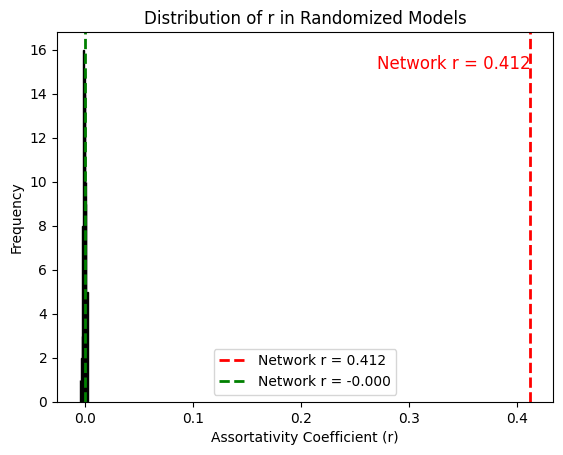

In [19]:
plt.hist(random_models_r, bins=15, edgecolor="black")

# Add vertical line for the none random network value
plt.axvline(r_net, color='red', linestyle='dashed', linewidth=2, label=f'Network r = {r_net:.3f}')

# Add vertical line for the none random network value
plt.axvline(CI_high, color='green', linestyle='dashed', linewidth=2, label=f'Network r = {CI_high:.3f}')

# Annotate the true value
plt.text(r_net, plt.ylim()[1] * 0.9, f'Network r = {r_net:.3f}', color='red', ha='right', fontsize=12)

# Labels
plt.xlabel("Assortativity Coefficient (r)")
plt.ylabel("Frequency")
plt.title("Distribution of r in Randomized Models")
plt.legend()

We can say with very high confidence that the original networks dosen't have completely random connections within different countries.

> __Exercise 2: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html)
>
> 1. Visualize the graph. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.

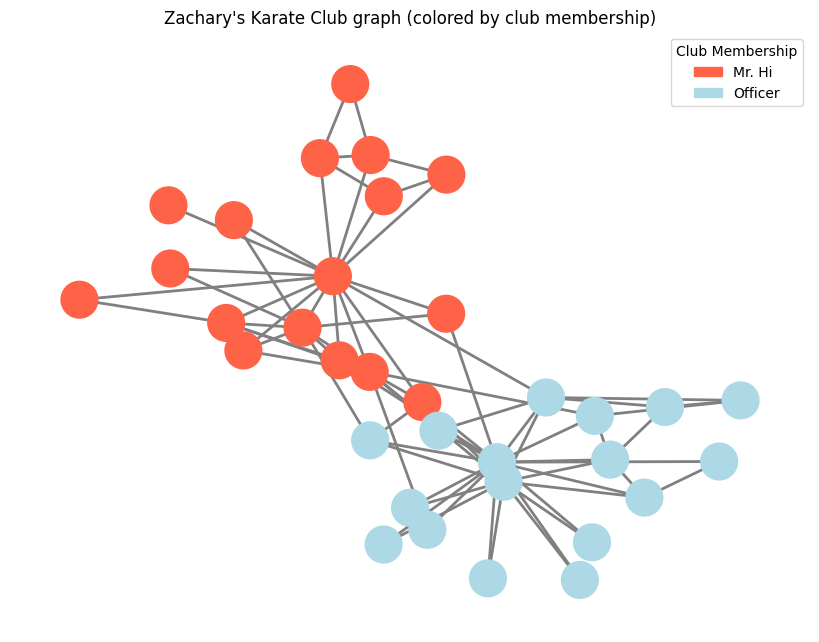

In [20]:
clubs = {'Mr. Hi': 'tomato', 'Officer': 'lightblue'}
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

node_colors = [clubs[G.nodes[node]['club']] for node in G.nodes]
legend_patches = [patches.Patch(color=color, label=club)
                 for club, color in clubs.items()]

plt.figure(figsize=(8, 6))
nx.draw(G, pos=pos, with_labels=False, node_color=node_colors, edge_color="gray", node_size=700, font_size=10, width=2)

plt.legend(handles=legend_patches,
           loc='upper right',
           title="Club Membership")

plt.title("Zachary's Karate Club graph (colored by club membership)")
plt.show()

> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.

In [21]:
def modularity(G, node_community):
    L = G.number_of_edges()

    # Compute L_c (intra-community edges) and k_c (degree sum per community)
    club_links = defaultdict(int)
    degrees = defaultdict(int)

    for u, v in G.edges():
        if node_community[u] == node_community[v]:  # Same club
            club_links[node_community[u]] += 1
        degrees[u] += 1
        degrees[v] += 1

    club_total_degrees = defaultdict(int)
    for i in range(len(degrees.values())):
        club_total_degrees[node_community[i]] += degrees[i]

    # Compute and return modularity using the equation from the book
    return sum((Lc / L) - (kc / (2 * L))**2 for Lc, kc in zip(club_links.values(), club_total_degrees.values()))

> 3. Explain in your own words the concept of _modularity_.

Modularity measures how well a given partition of a graph aligns with its community structure. A higher modularity score indicates a better division, meaning the detected communities have more internal connections and fewer external ones. A modularity of 0 suggests that all nodes belong to a single community. A negative modularity value may indicate that the number of communities is close to the number of individual nodes.

> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.

In [22]:
modularity(G, node_colors)

0.3582347140039447

> 5. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in the exercise above 5. For each of them, compute the modularity of the "club" split and store it in a list.

In [23]:
import random

def edge_swap(G, num_swaps):
    F = G.copy()
    edges = list(F.edges())

    for _ in range(num_swaps):
        edge1, edge2 = random.sample(edges, 2)

        if edge1[0] != edge2[1] and edge1[1] != edge2[0] and \
           (edge1[0], edge2[1]) not in F.edges() and (edge1[1], edge2[0]) not in F.edges():

            if np.random.choice([0, 1]) == 1:

                F.remove_edge(*edge1)
                F.remove_edge(*edge2)
                new_edge1 = (edge1[0], edge2[1])
                new_edge2 = (edge1[1], edge2[0])
                F.add_edge(*new_edge1)
                F.add_edge(*new_edge2)

                # Updates
                edges.remove(edge1)
                edges.remove(edge2)
                edges.append(new_edge1)
                edges.append(new_edge2)

    return F

modularities = []
swaps = G.number_of_edges()
for _ in tqdm(range(1000)):
    F = edge_swap(G,swaps)
    modularities.append(modularity(F,node_colors))

modularities[:10]

100%|██████████| 1000/1000 [00:00<00:00, 1133.84it/s]


[0.23002958579881652,
 0.10182445759368833,
 0.1531065088757396,
 0.17874753451676526,
 0.10182445759368833,
 0.17874753451676526,
 0.1531065088757396,
 0.10182445759368833,
 0.17874753451676526,
 0.12746548323471393]

> 6. Compute the average and standard deviation of the modularity for the random network.

In [24]:
average_modularity = np.mean(modularities)
std_modularity = np.std(modularities)

print(f"Average Modularity: {average_modularity}")
print(f"Standard Deviation: {std_modularity}")

Average Modularity: 0.1802347140039447
Standard Deviation: 0.044652475004162646


> 7. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)).

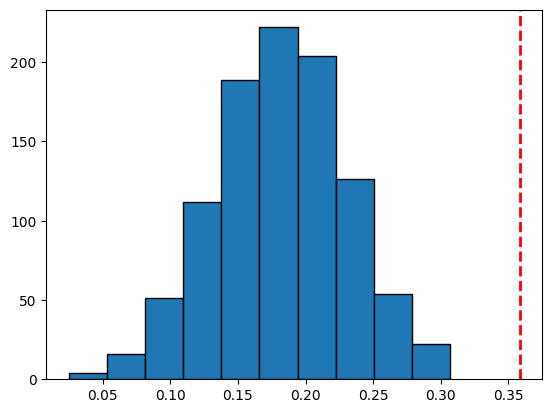

In [25]:
plt.hist(modularities, bins=10, edgecolor="black")
#plot vertical line for the actual modularity
plt.axvline(modularity(G, node_colors), color='red', linestyle='dashed', linewidth=2, label=f'Network Modularity = {modularity(G, node_colors):.3f}')

plt.show()

> 8. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

The randomization experiment generates an expected modularity distribution, serving as a baseline for significance testing. This allows us to test whether the observed split is statistically meaningful or could arise by chance in networks with similar degree sequences. Since the actual split metric falls far outside the random distribution, it supports that it is significant different from the baseline. This also means that the clup split for Mr. Hi vs Officer is a good partitioning, and suggests a community structure.

The node degree was preserved to control the network's inherent connectivity structure. By randomizing edges while keeping degrees fixed, differences in partitioning quality reflect true community structure rather than artifacts of how connected nodes are.

> 9.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

In [26]:
from community import community_louvain

In [27]:
louvain_partition = community_louvain.best_partition(G)
louvain_modularity = community_louvain.modularity(louvain_partition, G)

f'Louvain modularity: {louvain_modularity:.3f}'

'Louvain modularity: 0.444'

This value is higher than the club split of 0.358. This means that the Louvain algorithm found a more optimal community structure in terms of modularity compared to the real-word split. This suggests that while the Mr. Hi vs. Officer split captures meaningful social structure, it is not the most modular partition possible.

> 10.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

In [28]:
original_labels = [0 if G.nodes[node]['club'] == 'Mr. Hi' else 1 for node in G.nodes]

louvain_communities = list(louvain_partition.values())
A = len(set(louvain_communities))  # Number of Louvain communities

# Initialize confusion matrix D (2 rows x A columns)
D = np.zeros((2, A), dtype=int)

# Insert values in D
for node in G.nodes:
    original_group = 0 if G.nodes[node]['club'] == 'Mr. Hi' else 1
    louvain_group = louvain_partition[node]
    D[original_group, louvain_group] += 1

"Confusion Matrix D (rows: original splits, columns: Louvain communities):\n", D

('Confusion Matrix D (rows: original splits, columns: Louvain communities):\n',
 array([[11,  0,  5,  1],
        [ 0,  4,  0, 13]]))

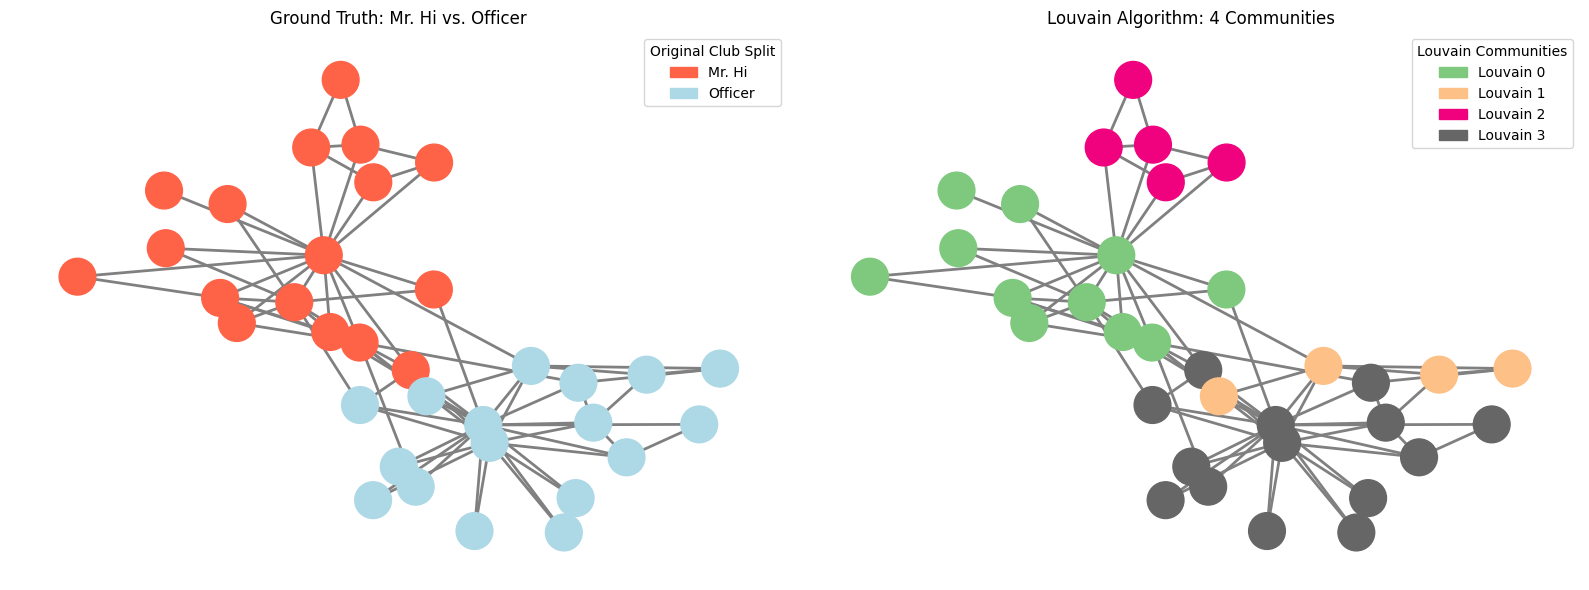

In [29]:
node_colors_original = node_colors

cmap = plt.get_cmap('Accent', A)
node_colors_louvain = [cmap(louvain_partition[node]) for node in G.nodes]

original_legend = [patches.Patch(color=color, label=club) for club, color in clubs.items()]
louvain_legend = [patches.Patch(color=cmap(i), label=f"Louvain {i}")
                for i in range(A)]

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
nx.draw(G, pos=pos, with_labels=False, node_color=node_colors_original,
        edge_color="gray", node_size=700, width=2)
plt.legend(handles=original_legend, loc='upper right', title="Original Club Split")
plt.title("Ground Truth: Mr. Hi vs. Officer")

plt.subplot(1, 2, 2)
nx.draw(G, pos=pos, with_labels=False, node_color=node_colors_louvain,
        edge_color="gray", node_size=700, width=2)
plt.legend(handles=louvain_legend, loc='upper right', title="Louvain Communities")
plt.title(f"Louvain Algorithm: {A} Communities")

plt.tight_layout()
plt.show()

The confusion matrix shows that Mr. Hi’s group is split into 3 groups with the Louvain algorithm consisting of 11, 2, and 3 nodes. And that Officer’s group is split into 2 groups of 4 and 13 nodes. The Louvain communities correspond moderately to the original split but prioritize modularity over ground truth.

# Part 3

In [30]:
from collections import Counter
from itertools import chain
import re
import ast
from wordcloud import WordCloud

### Exercise 1

#### 1) TD-IDF

TF stands for Term Frequency, and is a measure of how many times a word appears in a text, scaled (divided) by the length of the document.

IDF stands for Inverse Document Frequency, and measures the rarity of a given word (higher IDF meaning more rare). This is done by calculating how many documents the word appears in out of the total number of documents.

In total TF-IDF tries to give a measure of how special a word in to a given text, given a body of many text, hopefully capturing some information about the text.

#### (Getting the dataframes ready)

The following section contains the parts from the previous weeks, getting the data ready in the dataframes

In [32]:
# Constructing graph
df = pd.read_csv("data/author_edgelist.csv")
G = nx.Graph()
edges = [(row['author_1'], row['author_2'], row['weight']) for index, row in df.iterrows()]
G.add_weighted_edges_from(edges)

In [33]:
# Getting connected components
communities = list(nx.connected_components(G))

In [35]:
df = pd.read_csv("data/Works_alldata.csv")

In [36]:
def clean_string(authors):
    cleaned_string = authors.replace("[", "").replace("]", "").replace("'", "")
    authors = np.array(cleaned_string.split(", "))
    return authors

In [37]:
def invert_to_BOW(dictstring):
    text = []
    try:
        word_inv_dict = ast.literal_eval(dictstring)
        text = Counter()

        for word, occurrences in word_inv_dict.items():
            cleaned_word = re.sub(r"[^a-zA-Z]+", "", word.lower())
            if cleaned_word:
                text[cleaned_word] += len(occurrences)

        return list(text.elements())
    except:
        return None

In [38]:
# Making dictionary mapping authors to community
author_to_community = {author: idx for idx, community in enumerate(communities) for author in community}
# Some of the authors didnt appear in the graph at all, and thus didnt belong to any community.
# (This was probably caused by authors having only written papers alone.
# Nodes were only added to the graph if they had at least 1 collaborator, and therefor a few authors are left out from the graph)
# To handle the function below is made
def get_community(author):
    try:
        return int(author_to_community[str(author[0])])
    except:
        return None

In [39]:
# making the string of lists into an actual list
df["author"] = df["author_ids"].apply(clean_string)
# converting from inverse representation to a list of words. If a word appears multiple times, it is listed multiple times.
df["abstract_BOW"] = df["abstract_inverted_index"].apply(invert_to_BOW)
# the community of the authors of each paper is added to the dataframe.
df["community"] = df["author"].apply(get_community)
#this block takes roughly 20 sec to run, do to the invert_to_BOW function

#### 2) Getting all abstract tokens for each community

We have collected all information in one dataframe as seen below. For simplicity, a new dataframe is made, only consisting of the columns: abstact_BOW and community

In [40]:
df.head()

,id,publication_year,cited_by_count,author_ids,title,abstract_inverted_index,author,abstract_BOW,community
0,https://openalex.org/W4379513524,2023,18,"['https://openalex.org/A5072156055', 'https://...",The anatomy of a population-scale social network,"{'Abstract': [0], 'Large-scale': [1], 'human':...","[https://openalex.org/A5072156055, https://ope...","[abstract, largescale, human, social, social, ...",0.0
1,https://openalex.org/W3016360720,2020,37,"['https://openalex.org/A5072156055', 'https://...",Understanding Inequalities in Ride-Hailing Ser...,"{'Despite': [0], 'the': [1, 16, 42, 52, 81, 10...","[https://openalex.org/A5072156055, https://ope...","[despite, the, the, the, the, the, the, the, t...",0.0
2,https://openalex.org/W3098339481,2020,34,"['https://openalex.org/A5005839111', 'https://...",The role of geography in the complex diffusion...,"{'Abstract': [0], 'The': [1, 157], 'urban–rura...","[https://openalex.org/A5005839111, https://ope...","[abstract, the, the, the, the, the, the, the, ...",0.0
3,https://openalex.org/W2606124137,2018,22,"['https://openalex.org/A5072156055', 'https://...",Universal scaling laws in metro area election ...,"{'We': [0], 'explain': [1], 'the': [2, 19, 25,...","[https://openalex.org/A5072156055, https://ope...","[we, we, we, explain, the, the, the, the, the,...",0.0
4,https://openalex.org/W3103187161,2017,17,"['https://openalex.org/A5072156055', 'https://...",Prediction of employment and unemployment rate...,"{'By': [0], 'modeling': [1], 'macro-economical...","[https://openalex.org/A5072156055, https://ope...","[by, by, modeling, macroeconomical, indicators...",0.0


In [41]:
papers = df[["abstract_BOW", "community"]]
papers = papers.dropna(subset=['abstract_BOW']) # removing nans
papers.head()

,abstract_BOW,community
0,"[abstract, largescale, human, social, social, ...",0.0
1,"[despite, the, the, the, the, the, the, the, t...",0.0
2,"[abstract, the, the, the, the, the, the, the, ...",0.0
3,"[we, we, we, explain, the, the, the, the, the,...",0.0
4,"[by, by, modeling, macroeconomical, indicators...",0.0


In [42]:
com_words = papers.groupby('community')['abstract_BOW'].apply(lambda x: list(chain.from_iterable(x)))
com_words

community
0.0      [abstract, largescale, human, social, social, ...
1.0      [abstract, light, microscopic, autoradiography...
2.0      [abstract, bryozoan, bryozoan, carbonate, carb...
3.0      [representing, networks, in, in, in, in, in, a...
4.0      [questionnaire, questionnaire, design, design,...
                               ...                        
217.0    [achieving, fast, populations, populations, tr...
218.0    [we, we, we, report, on, on, the, the, the, th...
219.0    [stroke, stroke, stroke, stroke, stroke, strok...
221.0    [unitary, unitary, decomposition, decompositio...
222.0    [understanding, the, the, the, the, the, the, ...
Name: abstract_BOW, Length: 199, dtype: object

### 3) 5 top TF words

First the top 5 community, by number of authors, is computed

In [43]:
num_coms = 5
top_5_coms = np.argsort([len(com) for com in communities])[-num_coms:][::-1]
top_5_coms

array([  0, 134, 114, 104, 142])

In [44]:
for com in top_5_coms:
    words = com_words[com] # getting the wordlist for the given community
    TF = Counter(words) # creating dictionary of counts
    most_TF_words = TF.most_common(5)
    print(f"Top TF words in community {com}: {', '.join(np.asarray(most_TF_words)[:,0])}")

Top TF words in community 0: the, of, and, to, in
Top TF words in community 134: the, and, of, to, in
Top TF words in community 114: and, the, in, of, cancer
Top TF words in community 104: the, of, and, in, a
Top TF words in community 142: the, of, and, to, in


Above the most used words in the top 5 communities is printed. As shown these give very little information, as all words (except cancer) is fill words used in all texts, containing no information about the topics of the text.

Below all unique words in the whole text body are computed

In [45]:
all_words = []
for com in com_words:
    all_words.extend(com)
word_counts = Counter(all_words)
unique_words = list(word_counts.keys())

A dictionary of the IDF-score of all words are made.

In [46]:
def IDF(words):
    N = len(com_words)
    DF_dict = {word: 0 for word in words}

    for com in com_words:
        com_set = set(com)
        for word in words:
            if word in com_set:
                DF_dict[word] +=1

    IDF_dict = {word: float(np.log(N/DF_dict[word])) for word in words }
    return IDF_dict

IDF_dict = IDF(unique_words)

We used the natural logarithm, when computing the IDF-score, but there should be no difference between choosing different logaritms, as you can convert between any two logarithms by multipliing by some constant. Therefore the IDF scores will just be scaled be some amount.

### Top TF-IDF words

Computing the top 9 commmunities

In [47]:
num_coms = 9
top_9_coms = np.argsort([len(com) for com in communities])[-num_coms:][::-1]
top_9_coms

array([  0, 134, 114, 104, 142,  82,  51, 123, 217])

Making sure we can get the name of the authors

In [50]:
def get_highest_degree_authors(G, node_list, k):
    ids = sorted(node_list, key=lambda node: G.degree(node), reverse=True)[:k]
    return ids

authors = pd.read_csv("data/all_authors_from_graph.csv")
def get_author_name(id):
    return (authors[authors["id"] == id]["display_name"].values)[0]

In [51]:
for com in top_9_coms:
    words = com_words[com] # getting the wordlist for the given community
    TF = Counter(words) # creating dictionary of counts
    TF_IDF = {word: TF[word] * IDF_dict[word] for word in words}
    most_TFIDF_words = Counter(TF_IDF).most_common(10)
    most_TF_words = TF.most_common(5)
    print("--------------------------------")
    print(f"Community {com}")
    print(f"Number of authors: {len(communities[com])}")
    print(f"Top 3 authors: {', '.join([get_author_name(id) for id in get_highest_degree_authors(G,communities[com],3)])}")
    print(f"Top TF words: {', '.join(np.asarray(most_TF_words)[:,0])}")
    print(f"Top TF-IDF words: {', '.join(np.asarray(most_TFIDF_words)[:,0])}")

--------------------------------
Community 0
Number of authors: 11310
Top 3 authors: Shuicheng Yan, Alex Pentland, Robert West
Top TF words: the, of, and, to, in
Top TF-IDF words: social, network, networks, users, news, we, media, online, data, information
--------------------------------
Community 134
Number of authors: 137
Top 3 authors: Linda Li, Jihoon Kim, Catherine L. Backman
Top TF words: the, and, of, to, in
Top TF-IDF words: health, patient, cop, patients, decision, ra, cops, msk, sleep, arthritis
--------------------------------
Community 114
Number of authors: 108
Top 3 authors: Jie He, Hui Wang, Rongshou Zheng
Top TF words: and, the, in, of, cancer
Top TF-IDF words: cancer, incidence, mortality, china, registries, agestandardized, crude, areas, rural, urban
--------------------------------
Community 104
Number of authors: 94
Top 3 authors: Mauro Giovanni Carta, Antonio Preti, Maria Francesca Moro
Top TF words: the, of, and, in, a
Top TF-IDF words: bd, mental, fm, disorders,

The TF-IDF words are a lot more informative than the TF words. The high scoring TF IDF words are the ones that a given community uses more frequently than the others, thus are most defining for that community.

### Exercise 2: Wordcloud

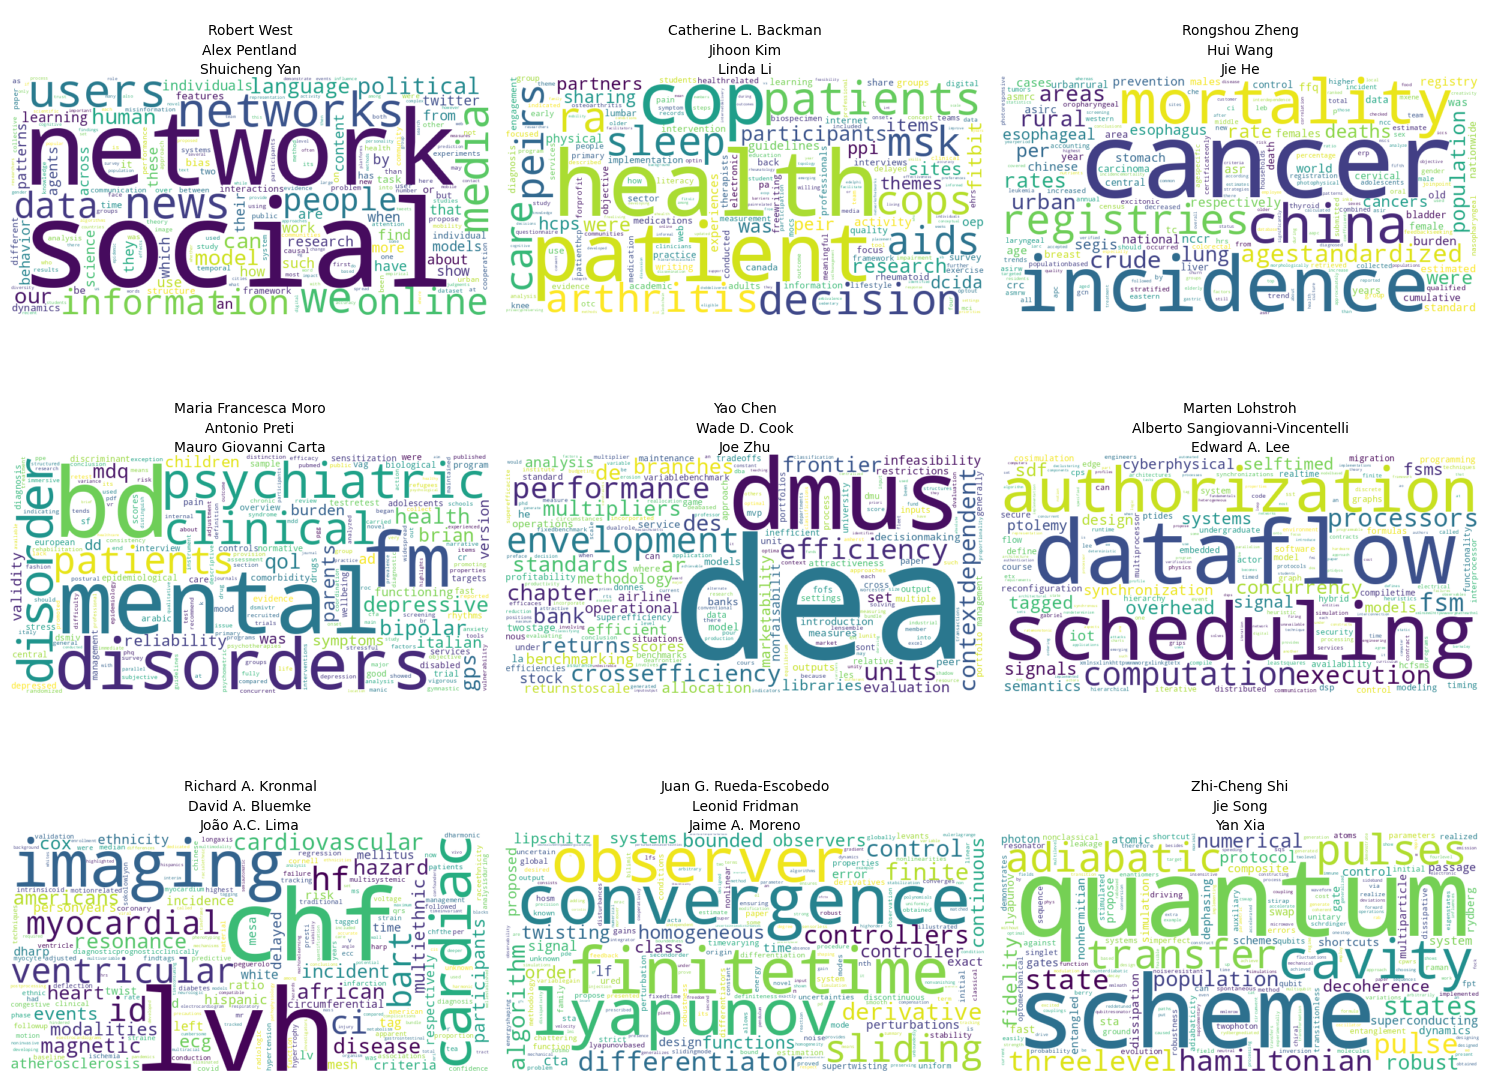

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Create a 3x3 grid of subplots

for i, (com, ax) in enumerate(zip(top_9_coms, axes.flatten())):
    words = com_words[com]  # Getting the wordlist for the given community
    TF = Counter(words)  # Creating dictionary of counts
    TF_IDF = Counter({word: TF[word] * IDF_dict[word] for word in words})

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(TF_IDF)

    topAuthors = [get_author_name(id) for id in get_highest_degree_authors(G, communities[com], 3)]

    # Plot the names at the top
    ax.text(0.5, 1.03, topAuthors[0], fontsize=10, ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 1.11, topAuthors[1], fontsize=10, ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 1.19, topAuthors[2], fontsize=10, ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 1.25, " ", fontsize=10, ha='center', va='center', transform=ax.transAxes)

    # Display the word cloud
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")  # Hide axes

# Show all plots in a single figure
plt.tight_layout()
plt.show()

#### Commenting on the results

It seems like the first community, which is by far the biggest, is the most "core" computational social science group. Its most defining word include, social, network, users, information, news, twitter, which reflects the way of studying big data from the web to say something about a given research question. These research questions could be given by some of the less used words, which are still characteristic of the community, fx. patterns, behavior, model, which suggests that the research is in making models and finding patterns in peoples behavior - which is characteristic for social science.

The 8 smaller communities, with around 100 authors in each, definitely all have a focus each, the second-largest community having words like health, patients, arthritis as most defining word, suggest that the community is using data in the hospital/medical sector. The following communities each have their own theme, fx psycological disorders, quantum physics, mathematics and IT.

These communities makes sense since we have chosen to include articles which have a computational topic combined with a social-science topic.

#### Top authors

The top authors of the first (big) community are computer scientists, with focus on multimedia research and behavioral science, and all seems to be awarded or well known. This makes sense since these topics are core topics within computational social science.

In the smaller communities the top authors have proffesions correspnding to the theme of the words, fx in the second community, whith health related words, the top 3 authors are doctors or in biomedical research.

### Exercise 3: rewising understanding of computational social science

In week 1 our approach to computational social science, was ways to use big data to do some kind of research, mostly in behavioral or social science.

That is mostly the understanding we have still. Our investigation of the papers and authors related to CSS have shown that data driven research, with some social focus is used widely in many areas, though some of the discovered fields, might be a bit out of scope for CSS.

If we only considering the biggest community found in our research as the "true" social science community, it includes a little more then 10.000 scientists.